In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("insurance.csv", sep=';')

In [17]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


<div class="alert alert-block alert-info">
📝 <b>Zadanie 1</b><br>
    Przygotuj dane:
    <ul>
    <li>Przekształć zmienne tekstowe na zmienne binarne lub kategoryczne</li>
    <li>Wystandaryzuj dane numeryczne</li>
    <li>Dokonaj podziału na zbiory treningowe i testowe</li>
    </ul></div>

In [18]:
df["sex"]=df["sex"].apply(lambda x: 1 if x=="male" else 0)
df["smoker"]=df["smoker"].apply(lambda x: 1 if x=="yes" else 0)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X = df[["age","bmi", "children"]]

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns=X.columns)
X_scaled.head()

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614


In [22]:
df[["age","bmi","children"]]=X_scaled
df

,age,sex,bmi,children,smoker,charges
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,1725.55230
2,-0.797954,1,0.383307,1.580926,0,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,10600.54830
1334,-1.509965,0,0.206139,-0.908614,0,2205.98080
1335,-1.509965,0,1.014878,-0.908614,0,1629.83350
1336,-1.296362,0,-0.797813,-0.908614,0,2007.94500


In [24]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop("charges", axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.1</b><br>
Przygotuj estymator modelu perceptrona wielowarstwowego o poniższych cechach:
<ul>
<li>architektura składająca się z 2 warstw ukrytych:</li>
    <ul>
    <li>pierwsza warstwa ukryta o 128 neuronach</li>
    <li>druga warstwa ukryta o 64 neuronach</li>
    </ul>
<li>funkcja aktywacji dla warstw ukrytych: relu</li>
<li>optymalizator wag neuronów (solver): adam</li>
<li>maksymalna liczba iteracji: 1000</li>
<li>rozmiar wsadu (batch size): 64</li>
<li>ziarno losowości (random_state): 42</li>
</ul>
Wytrenuj model na wystandaryzowanych danych treningowych.
</div>

In [40]:
from sklearn.neural_network import MLPRegressor

In [41]:
reg_model = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=1200,
    batch_size=64,
    random_state=42
)

In [42]:
reg_model.fit(X_train, y_train)

C:\Users\Kacper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(128, 64), max_iter=1200,
             random_state=42)

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.2</b><br>
Dokonaj prognozy zbioru testowego. Oblicz wartość współczynnika R2.</div>

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error

In [44]:
y_pred = reg_model.predict(X_test)

In [45]:
r2_score(y_true = y_test, y_pred = y_pred)

0.8274899757378285

In [46]:
mean_absolute_error(y_true = y_test, y_pred = y_pred)

2715.4798341632963

<div class="alert alert-block alert-info">
<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.1</b><br>
Korzystając z biblioteki tensorflow, przygotuj architekturę sieci neuronowej o poniższych cechach:
<ul>
<li>2 warstwy ukryte:</li>
    <ul>
    <li>pierwsza warstwa ukryta o 128 neuronach</li>
    <li>druga warstwa ukryta o 64 neuronach</li>
    </ul>
<li>funkcja aktywacji dla warstw ukrytych: relu</li>
</ul>
</div>
</div>

In [47]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [60]:
model = models.Sequential()
model.add(Dense(units= 128, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 1, activation=None)) # Tylko  1 neuron, poniewaz w zagadnieniu regresji przewidujemy tylko 1 ciagla wartosc

<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.2</b><br>
Skompiluj model, wykorzystując:<br>
<ul>
    <li>optimizer (optymalizator wag neuronów, solver): <i>adam</i></li>
<li>funkcję straty: <i>mean_squared_error</i></li>
</ul>
</div>

In [61]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               768       
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.3</b><br>
Wytrenujmy powyższy model. Liczba epok równa 1000 i rozmiar batcha równy 64.
</div>

In [63]:
model.fit(X_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
17/17 [==============================] - 1s 2ms/step - loss: 329734432.0000 - mean_absolute_error: 13441.2930
Epoch 2/1000
17/17 [==============================] - 0s 2ms/step - loss: 329688544.0000 - mean_absolute_error: 13439.7217
Epoch 3/1000
17/17 [==============================] - 0s 2ms/step - loss: 329609408.0000 - mean_absolute_error: 13437.0293
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 329464640.0000 - mean_absolute_error: 13432.3115
Epoch 5/1000
17/17 [==============================] - 0s 2ms/step - loss: 329210880.0000 - mean_absolute_error: 13424.1865
Epoch 6/1000
17/17 [==============================] - 0s 2ms/step - loss: 328794464.0000 - mean_absolute_error: 13411.0488
Epoch 7/1000
17/17 [==============================] - 0s 2ms/step - loss: 328151936.0000 - mean_absolute_error: 13391.2754
Epoch 8/1000
17/17 [==============================] - 0s 2ms/step - loss: 327235424.0000 - mean_absolute_error: 13363.1357
Epoch 9/1000
17/

17/17 [==============================] - 0s 2ms/step - loss: 69127032.0000 - mean_absolute_error: 6277.8862
Epoch 68/1000
17/17 [==============================] - 0s 2ms/step - loss: 68202408.0000 - mean_absolute_error: 6235.7466
Epoch 69/1000
17/17 [==============================] - 0s 2ms/step - loss: 67321360.0000 - mean_absolute_error: 6200.1172
Epoch 70/1000
17/17 [==============================] - 0s 2ms/step - loss: 66432648.0000 - mean_absolute_error: 6162.6953
Epoch 71/1000
17/17 [==============================] - 0s 2ms/step - loss: 65574396.0000 - mean_absolute_error: 6130.5972
Epoch 72/1000
17/17 [==============================] - 0s 2ms/step - loss: 64665748.0000 - mean_absolute_error: 6089.8594
Epoch 73/1000
17/17 [==============================] - 0s 2ms/step - loss: 63833504.0000 - mean_absolute_error: 6053.2627
Epoch 74/1000
17/17 [==============================] - 0s 2ms/step - loss: 62987100.0000 - mean_absolute_error: 6015.0469
Epoch 75/1000
17/17 [=================

Epoch 134/1000
17/17 [==============================] - 0s 2ms/step - loss: 36232912.0000 - mean_absolute_error: 4314.0503
Epoch 135/1000
17/17 [==============================] - 0s 2ms/step - loss: 36158432.0000 - mean_absolute_error: 4297.6587
Epoch 136/1000
17/17 [==============================] - 0s 2ms/step - loss: 36070460.0000 - mean_absolute_error: 4283.1226
Epoch 137/1000
17/17 [==============================] - 0s 2ms/step - loss: 36020780.0000 - mean_absolute_error: 4278.6895
Epoch 138/1000
17/17 [==============================] - 0s 2ms/step - loss: 35937196.0000 - mean_absolute_error: 4256.6470
Epoch 139/1000
17/17 [==============================] - 0s 2ms/step - loss: 35862060.0000 - mean_absolute_error: 4243.7676
Epoch 140/1000
17/17 [==============================] - 0s 2ms/step - loss: 35802096.0000 - mean_absolute_error: 4233.6177
Epoch 141/1000
17/17 [==============================] - 0s 2ms/step - loss: 35743492.0000 - mean_absolute_error: 4221.3945
Epoch 142/1000
1

17/17 [==============================] - 0s 2ms/step - loss: 33867488.0000 - mean_absolute_error: 3947.0439
Epoch 201/1000
17/17 [==============================] - 0s 2ms/step - loss: 33841404.0000 - mean_absolute_error: 3942.2034
Epoch 202/1000
17/17 [==============================] - 0s 2ms/step - loss: 33814068.0000 - mean_absolute_error: 3937.6851
Epoch 203/1000
17/17 [==============================] - 0s 2ms/step - loss: 33783884.0000 - mean_absolute_error: 3928.0981
Epoch 204/1000
17/17 [==============================] - 0s 2ms/step - loss: 33755156.0000 - mean_absolute_error: 3929.2168
Epoch 205/1000
17/17 [==============================] - 0s 2ms/step - loss: 33739980.0000 - mean_absolute_error: 3926.9407
Epoch 206/1000
17/17 [==============================] - 0s 2ms/step - loss: 33696660.0000 - mean_absolute_error: 3926.7280
Epoch 207/1000
17/17 [==============================] - 0s 2ms/step - loss: 33674776.0000 - mean_absolute_error: 3922.0276
Epoch 208/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 31725238.0000 - mean_absolute_error: 3732.7205
Epoch 267/1000
17/17 [==============================] - 0s 2ms/step - loss: 31676908.0000 - mean_absolute_error: 3729.4639
Epoch 268/1000
17/17 [==============================] - 0s 2ms/step - loss: 31652564.0000 - mean_absolute_error: 3726.3218
Epoch 269/1000
17/17 [==============================] - 0s 2ms/step - loss: 31608100.0000 - mean_absolute_error: 3712.0586
Epoch 270/1000
17/17 [==============================] - 0s 2ms/step - loss: 31572160.0000 - mean_absolute_error: 3712.2622
Epoch 271/1000
17/17 [==============================] - 0s 2ms/step - loss: 31517098.0000 - mean_absolute_error: 3713.5747
Epoch 272/1000
17/17 [==============================] - 0s 2ms/step - loss: 31492564.0000 - mean_absolute_error: 3706.2195
Epoch 273/1000
17/17 [==============================] - 0s 2ms/step - loss: 31435332.0000 - mean_absolute_error: 3698.5256
Epoch 274/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 28569580.0000 - mean_absolute_error: 3421.3936
Epoch 333/1000
17/17 [==============================] - 0s 2ms/step - loss: 28521066.0000 - mean_absolute_error: 3402.1062
Epoch 334/1000
17/17 [==============================] - 0s 2ms/step - loss: 28461518.0000 - mean_absolute_error: 3398.8511
Epoch 335/1000
17/17 [==============================] - 0s 3ms/step - loss: 28404696.0000 - mean_absolute_error: 3395.0708
Epoch 336/1000
17/17 [==============================] - 0s 2ms/step - loss: 28386526.0000 - mean_absolute_error: 3388.3948
Epoch 337/1000
17/17 [==============================] - 0s 2ms/step - loss: 28284622.0000 - mean_absolute_error: 3383.8894
Epoch 338/1000
17/17 [==============================] - 0s 2ms/step - loss: 28240522.0000 - mean_absolute_error: 3383.0586
Epoch 339/1000
17/17 [==============================] - 0s 2ms/step - loss: 28178234.0000 - mean_absolute_error: 3381.9556
Epoch 340/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 24784806.0000 - mean_absolute_error: 3047.3972
Epoch 399/1000
17/17 [==============================] - 0s 2ms/step - loss: 24726106.0000 - mean_absolute_error: 3031.3896
Epoch 400/1000
17/17 [==============================] - 0s 2ms/step - loss: 24661866.0000 - mean_absolute_error: 3019.0312
Epoch 401/1000
17/17 [==============================] - 0s 2ms/step - loss: 24603666.0000 - mean_absolute_error: 3016.3733
Epoch 402/1000
17/17 [==============================] - 0s 2ms/step - loss: 24558080.0000 - mean_absolute_error: 3014.2349
Epoch 403/1000
17/17 [==============================] - 0s 2ms/step - loss: 24498112.0000 - mean_absolute_error: 3006.5105
Epoch 404/1000
17/17 [==============================] - 0s 2ms/step - loss: 24461430.0000 - mean_absolute_error: 2998.6475
Epoch 405/1000
17/17 [==============================] - 0s 2ms/step - loss: 24395756.0000 - mean_absolute_error: 2991.8052
Epoch 406/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 22114022.0000 - mean_absolute_error: 2751.1548
Epoch 465/1000
17/17 [==============================] - 0s 2ms/step - loss: 22122142.0000 - mean_absolute_error: 2787.9441
Epoch 466/1000
17/17 [==============================] - 0s 2ms/step - loss: 22082350.0000 - mean_absolute_error: 2761.9221
Epoch 467/1000
17/17 [==============================] - 0s 2ms/step - loss: 22058916.0000 - mean_absolute_error: 2745.2759
Epoch 468/1000
17/17 [==============================] - 0s 2ms/step - loss: 22033602.0000 - mean_absolute_error: 2751.0764
Epoch 469/1000
17/17 [==============================] - 0s 2ms/step - loss: 22006714.0000 - mean_absolute_error: 2758.9414
Epoch 470/1000
17/17 [==============================] - 0s 2ms/step - loss: 21995330.0000 - mean_absolute_error: 2765.4802
Epoch 471/1000
17/17 [==============================] - 0s 2ms/step - loss: 21971060.0000 - mean_absolute_error: 2751.3218
Epoch 472/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 21132428.0000 - mean_absolute_error: 2670.6174
Epoch 531/1000
17/17 [==============================] - 0s 2ms/step - loss: 21112578.0000 - mean_absolute_error: 2643.7444
Epoch 532/1000
17/17 [==============================] - 0s 2ms/step - loss: 21112806.0000 - mean_absolute_error: 2636.2954
Epoch 533/1000
17/17 [==============================] - 0s 2ms/step - loss: 21098630.0000 - mean_absolute_error: 2661.0793
Epoch 534/1000
17/17 [==============================] - 0s 2ms/step - loss: 21080706.0000 - mean_absolute_error: 2656.7253
Epoch 535/1000
17/17 [==============================] - 0s 2ms/step - loss: 21086900.0000 - mean_absolute_error: 2658.4692
Epoch 536/1000
17/17 [==============================] - 0s 2ms/step - loss: 21066766.0000 - mean_absolute_error: 2640.3152
Epoch 537/1000
17/17 [==============================] - 0s 2ms/step - loss: 21066044.0000 - mean_absolute_error: 2636.1223
Epoch 538/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 20620202.0000 - mean_absolute_error: 2610.2329
Epoch 597/1000
17/17 [==============================] - 0s 2ms/step - loss: 20615360.0000 - mean_absolute_error: 2562.6636
Epoch 598/1000
17/17 [==============================] - 0s 2ms/step - loss: 20607696.0000 - mean_absolute_error: 2593.3376
Epoch 599/1000
17/17 [==============================] - 0s 2ms/step - loss: 20592290.0000 - mean_absolute_error: 2577.6445
Epoch 600/1000
17/17 [==============================] - 0s 2ms/step - loss: 20574194.0000 - mean_absolute_error: 2562.6558
Epoch 601/1000
17/17 [==============================] - 0s 2ms/step - loss: 20579698.0000 - mean_absolute_error: 2586.6367
Epoch 602/1000
17/17 [==============================] - 0s 2ms/step - loss: 20559964.0000 - mean_absolute_error: 2599.3586
Epoch 603/1000
17/17 [==============================] - 0s 2ms/step - loss: 20568172.0000 - mean_absolute_error: 2568.8105
Epoch 604/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 20225168.0000 - mean_absolute_error: 2523.6719
Epoch 663/1000
17/17 [==============================] - 0s 2ms/step - loss: 20220118.0000 - mean_absolute_error: 2527.5386
Epoch 664/1000
17/17 [==============================] - 0s 2ms/step - loss: 20214060.0000 - mean_absolute_error: 2523.6748
Epoch 665/1000
17/17 [==============================] - 0s 2ms/step - loss: 20209108.0000 - mean_absolute_error: 2518.3694
Epoch 666/1000
17/17 [==============================] - 0s 2ms/step - loss: 20238178.0000 - mean_absolute_error: 2551.8823
Epoch 667/1000
17/17 [==============================] - 0s 2ms/step - loss: 20197358.0000 - mean_absolute_error: 2561.0554
Epoch 668/1000
17/17 [==============================] - 0s 2ms/step - loss: 20222880.0000 - mean_absolute_error: 2494.8315
Epoch 669/1000
17/17 [==============================] - 0s 2ms/step - loss: 20209830.0000 - mean_absolute_error: 2535.3066
Epoch 670/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 19935106.0000 - mean_absolute_error: 2487.1951
Epoch 729/1000
17/17 [==============================] - 0s 2ms/step - loss: 19943088.0000 - mean_absolute_error: 2456.9412
Epoch 730/1000
17/17 [==============================] - 0s 3ms/step - loss: 19919412.0000 - mean_absolute_error: 2494.5034
Epoch 731/1000
17/17 [==============================] - 0s 2ms/step - loss: 19926662.0000 - mean_absolute_error: 2524.3914
Epoch 732/1000
17/17 [==============================] - 0s 2ms/step - loss: 19918316.0000 - mean_absolute_error: 2499.5654
Epoch 733/1000
17/17 [==============================] - 0s 2ms/step - loss: 19932622.0000 - mean_absolute_error: 2515.7439
Epoch 734/1000
17/17 [==============================] - 0s 2ms/step - loss: 19942342.0000 - mean_absolute_error: 2456.4692
Epoch 735/1000
17/17 [==============================] - 0s 2ms/step - loss: 19910160.0000 - mean_absolute_error: 2486.8059
Epoch 736/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 19688592.0000 - mean_absolute_error: 2477.7805
Epoch 795/1000
17/17 [==============================] - 0s 2ms/step - loss: 19684330.0000 - mean_absolute_error: 2452.6897
Epoch 796/1000
17/17 [==============================] - 0s 2ms/step - loss: 19680266.0000 - mean_absolute_error: 2457.0564
Epoch 797/1000
17/17 [==============================] - 0s 2ms/step - loss: 19681060.0000 - mean_absolute_error: 2480.9375
Epoch 798/1000
17/17 [==============================] - 0s 2ms/step - loss: 19704936.0000 - mean_absolute_error: 2439.0447
Epoch 799/1000
17/17 [==============================] - 0s 2ms/step - loss: 19670360.0000 - mean_absolute_error: 2457.3354
Epoch 800/1000
17/17 [==============================] - 0s 2ms/step - loss: 19668854.0000 - mean_absolute_error: 2495.5171
Epoch 801/1000
17/17 [==============================] - 0s 2ms/step - loss: 19661930.0000 - mean_absolute_error: 2460.4207
Epoch 802/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 19510438.0000 - mean_absolute_error: 2466.4565
Epoch 861/1000
17/17 [==============================] - 0s 2ms/step - loss: 19514896.0000 - mean_absolute_error: 2473.6917
Epoch 862/1000
17/17 [==============================] - 0s 2ms/step - loss: 19512410.0000 - mean_absolute_error: 2447.3726
Epoch 863/1000
17/17 [==============================] - 0s 2ms/step - loss: 19526144.0000 - mean_absolute_error: 2453.4392
Epoch 864/1000
17/17 [==============================] - 0s 2ms/step - loss: 19524912.0000 - mean_absolute_error: 2451.5693
Epoch 865/1000
17/17 [==============================] - 0s 2ms/step - loss: 19496560.0000 - mean_absolute_error: 2435.5828
Epoch 866/1000
17/17 [==============================] - 0s 2ms/step - loss: 19496372.0000 - mean_absolute_error: 2466.2087
Epoch 867/1000
17/17 [==============================] - 0s 2ms/step - loss: 19524652.0000 - mean_absolute_error: 2507.0332
Epoch 868/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 19400344.0000 - mean_absolute_error: 2443.2603
Epoch 927/1000
17/17 [==============================] - 0s 2ms/step - loss: 19392990.0000 - mean_absolute_error: 2449.7412
Epoch 928/1000
17/17 [==============================] - 0s 2ms/step - loss: 19387770.0000 - mean_absolute_error: 2438.8540
Epoch 929/1000
17/17 [==============================] - 0s 2ms/step - loss: 19382890.0000 - mean_absolute_error: 2441.2952
Epoch 930/1000
17/17 [==============================] - 0s 2ms/step - loss: 19389934.0000 - mean_absolute_error: 2472.5227
Epoch 931/1000
17/17 [==============================] - 0s 2ms/step - loss: 19389578.0000 - mean_absolute_error: 2460.6704
Epoch 932/1000
17/17 [==============================] - 0s 2ms/step - loss: 19389548.0000 - mean_absolute_error: 2417.3188
Epoch 933/1000
17/17 [==============================] - 0s 2ms/step - loss: 19376768.0000 - mean_absolute_error: 2431.6245
Epoch 934/1000
17/17 [=========

17/17 [==============================] - 0s 2ms/step - loss: 19312662.0000 - mean_absolute_error: 2414.4622
Epoch 993/1000
17/17 [==============================] - 0s 2ms/step - loss: 19306636.0000 - mean_absolute_error: 2459.0842
Epoch 994/1000
17/17 [==============================] - 0s 2ms/step - loss: 19291388.0000 - mean_absolute_error: 2448.8401
Epoch 995/1000
17/17 [==============================] - 0s 2ms/step - loss: 19306630.0000 - mean_absolute_error: 2449.0220
Epoch 996/1000
17/17 [==============================] - 0s 2ms/step - loss: 19292364.0000 - mean_absolute_error: 2434.4990
Epoch 997/1000
17/17 [==============================] - 0s 2ms/step - loss: 19289244.0000 - mean_absolute_error: 2427.6113
Epoch 998/1000
17/17 [==============================] - 0s 2ms/step - loss: 19299386.0000 - mean_absolute_error: 2413.2646
Epoch 999/1000
17/17 [==============================] - 0s 2ms/step - loss: 19282688.0000 - mean_absolute_error: 2454.4568
Epoch 1000/1000
17/17 [========

<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.4</b><br>
Dokonaj prognozy zbioru testowego. Oblicz wartość współczynnika R2.</div>

In [64]:
y_pred2 = model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [66]:
r2_score(y_true = y_test, y_pred = y_pred2)

0.82610968521992

In [68]:
mean_absolute_error(y_true = y_test, y_pred = y_pred2)

2664.6841117792387

# Walidajca

In [69]:
model = models.Sequential()
model.add(Dense(units =128, activation = 'relu', input_shape =(X_train.shape[1], ))) #pierwsza warstwa ukryta
model.add(Dense(units =64, activation = 'relu')) #druga warstwa ukryta
model.add(Dense(units = 1)) # warstwa wyjsciowa

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [71]:
model_hist = model.fit(X_train, y_train, batch_size=64, epochs=1000, verbose=0)

In [72]:
model_hist.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

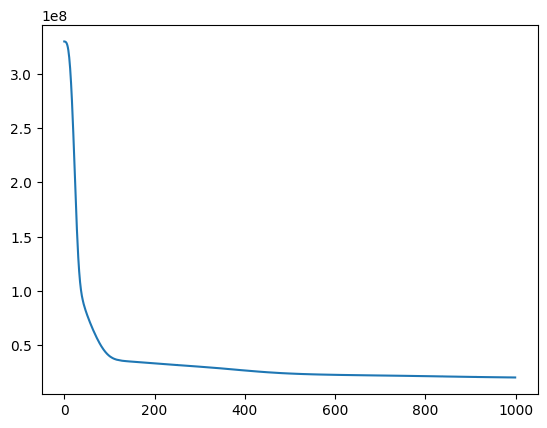

In [73]:
import matplotlib.pyplot as plt

epochs = 1000
plt.plot(list(range(epochs)), model_hist.history['loss'])
plt.show()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [75]:
model = models.Sequential()
model.add(Dense(units =128, activation = 'relu', input_shape =(X_train.shape[1], ))) #pierwsza warstwa ukryta
model.add(Dense(units =64, activation = 'relu')) #druga warstwa ukryta
model.add(Dense(units = 1)) # warstwa wyjsciowa

In [76]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [78]:
model_hist = model.fit(X_train, y_train, batch_size=64, epochs=1000, verbose=0, validation_data=(X_val,y_val))

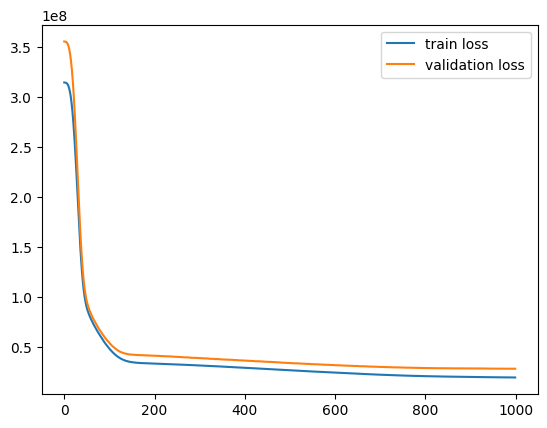

In [81]:
plt.plot(list(range(epochs)), model_hist.history['loss'], label = 'train loss')
plt.plot(list(range(epochs)), model_hist.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()